In [1]:
from shapely import Point , LineString , LinearRing , Polygon
from shapely import MultiPoint , MultiLineString , MultiPolygon

# 1.几何集合(GeometryCollection):

### 一些Shapely操作可能会出现多项几何对象的集合（collections）。例如，两个LineString可能沿着一条线和在一个点相交。为了表示这些结果，Shapely提供了类似于frozenset的、不可改变的几何对象的集合。这些集合可以是同质的（复合点等）或异质的（点与线的集合）。

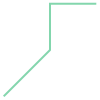

In [2]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
a

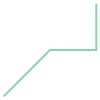

In [3]:
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
b

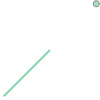

In [4]:
x = a.intersection(b)
x

### 几何集合(GeometryCollection)的成员可以通过geoms属性来访问。复合几何元素没有坐标序列，坐标序列被存储在组成其的几何要素上。

In [5]:
list(x.geoms)

[<LINESTRING (0 0, 1 1)>, <POINT (2 2)>]

In [6]:
# 获取第一个几何要素的坐标序列
x.geoms[0].coords[:]

[(0.0, 0.0), (1.0, 1.0)]

# 2.复合点（Collections of Points）：

### class MultiPoint(points) ：复合点构造函数接收一系列（x, y[, z ]）点元祖。

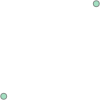

In [7]:
points = MultiPoint([(0,0) , (1,1)])
points

### MultiPoint的面积和长度都是零。

In [8]:
points.area , points.length

(0.0, 0.0)

### 其边界是一个元组（minx, miny, maxx, maxy）。

In [9]:
points.bounds

(0.0, 0.0, 1.0, 1.0)

### 其成员可以通过geoms属性来访问。

In [10]:
list(points.geoms)

[<POINT (0 0)>, <POINT (1 1)>]

### 其构造函数也接受另一个MultiPoint实例或一个无序的Point实例序列，从而得到一个副本。

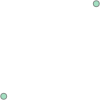

In [11]:
MultiPoint(points)

# 3.复合线（Collections of Lines）：

### class MultiLineString(lines) ：MultiLineString构造函数接收线性元祖序列或对象。

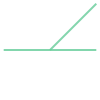

In [12]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

### MultiLineString的面积为零，长度不为零。

In [13]:
lines.area , lines.length

(0.0, 3.414213562373095)

### 其边界是一个元组（minx, miny, maxx, maxy）。

In [14]:
lines.bounds

(-1.0, 0.0, 1.0, 1.0)

### 其成员可以通过geoms属性来访问。

In [15]:
list(lines.geoms)

[<LINESTRING (0 0, 1 1)>, <LINESTRING (-1 0, 1 0)>]

### 构造函数也接受另一个MultiLineString的实例或LineString实例的无序序列，从而得到一个副本。

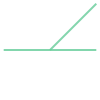

In [16]:
MultiLineString(lines)

# 4.复合多边形（Collections of Polygons）：

### class MultiPolygon(polygons) ：复合多边形构造函数接收外部线环和内部线环（洞）两组序列元祖。

### 构造函数同样也接收接受一个无序的Polygon实例序列，从而得到一个副本。

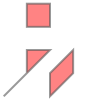

In [17]:
polygon = Polygon([(0,0) , (1,1) , (1,2) , (2,2) , (0,0)])
s = Polygon([(2,0) , (2,1) , (3,2) , (3,1) , (2,0)])
t = Polygon([(1,3) , (1,4) , (2,4) , (2,3) , (1,3)])


polygons = MultiPolygon([polygon, s, t])
polygons

<AxesSubplot:>

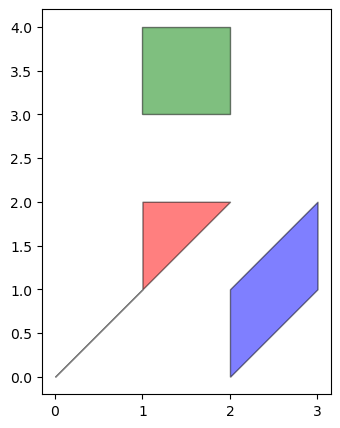

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

f ,ax = plt.subplots(figsize=(5,5))
gpd.GeoDataFrame([polygon] , columns=["geometry"]).plot(ax=ax , facecolor="red" , edgecolor="k" , alpha=0.5)
gpd.GeoDataFrame([s] , columns=["geometry"]).plot(ax=ax , facecolor="blue" , edgecolor="k" , alpha=0.5)
gpd.GeoDataFrame([t] , columns=["geometry"]).plot(ax=ax , facecolor="green" , edgecolor="k" , alpha=0.5)

### 其边界是一个元组（minx, miny, maxx, maxy）。

In [19]:
polygons.bounds

(0.0, 0.0, 3.0, 4.0)

### 其成员是Polygon实例，可以通过geoms属性访问。

In [20]:
list(polygons.geoms)

[<POLYGON ((0 0, 1 1, 1 2, 2 2, 0 0))>,
 <POLYGON ((2 0, 2 1, 3 2, 3 1, 2 0))>,
 <POLYGON ((1 3, 1 4, 2 4, 2 3, 1 3))>]